In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## ___GLMM___
----------------

In [ ]:
# https://medium.com/@akif.iips/understanding-random-effect-and-fixed-effect-in-statistical-analysis-db4983cdf8b1
# https://stats.oarc.ucla.edu/other/mult-pkg/introduction-to-linear-mixed-models/#:~:text=Linear%20mixed%20models%20are%20an%20extension%20of,within%20classrooms%2C%20or%20patients%20from%20within%20doctors.
# https://m-clark.github.io/mixed-models-with-R/

In [ ]:
# first of all, all of thes are linear models, WE ARE ESSENTIALLY LOOKING AT COMPLEX NON-POLYNOMIAL REGRESSION!!!

In [2]:
# fixed effects - consider a group with groups within, the overarching group will have a common slope shared by all 
# the subgroups, but each subgroup will have its own intercept. This accounts for the unique group specific variations (different biases)

# random effects - using the same example, 

### ___Fixed Effects___
---------

In [ ]:
# a study tries to investigate the efficacy of two different teaching methods in student performance using school students across 
# a set of diferent schools

# the impact teaching method has on student performance is of interest to us
# but there could be other factors influencing the student performance, like there may be school specific factors - mean socioeconomic
# status of the students, mean attendence rates, gender distribution of pupil, facilities available in the school, funding that the said
# school receives to support special-ed students and whatnot

# consider the following linear equation
# score of each student - S_i
# coefficient quantifying the teaching method's influence - lambda
# teaching method - M
# intercept - c
# error term for each student - epsilon_i

## $S_i = \lambda M + c + \varepsilon_i$

In [4]:
# incorporating the school level fixed effects, say that we have 5 different schools A,B, C, D and E
# the ebove equation changes into

## $S_i = \lambda M + \alpha_1 A + \alpha_2 B + \alpha_3 C + \alpha_4 D + c + \varepsilon_i$

In [ ]:
# alpha's are the cognate quantified effects of a student belonging to a select school
# A, B, C, D and E can be understood as a binary variable, switching the correct corresponding coefficient on for each student

#### ___Random Effects___
-----------------

## ___Implementation___
-------------

In [2]:
groot = pd.read_csv(r"./GRooTFullVersion.csv", low_memory=False, encoding="latin")

In [40]:
groot.mycorrhizalAssociationType.dropna().unique()

array(['AM', 'NM', 'EcM', 'EcM-AM', 'ErM', 'NM-AM', 'OM'], dtype=object)

In [17]:
genera, freq = np.unique(groot.genus.dropna(), return_counts=True)
# freq.max()
genera[np.argmax(freq)]

'Pinus'

In [42]:
srl_pinus = groot.query("genus == 'Pinus' & traitName == 'Specific_root_length'").\
                        loc[:, ["mycorrhizalAssociationType", "genus", "species", "traitName", "traitValue"]].dropna()

In [45]:
srl_pinus

,mycorrhizalAssociationType,genus,species,traitName,traitValue
3891,EcM,Pinus,armandii,Specific_root_length,2.119423
3896,EcM,Pinus,armandii,Specific_root_length,43.014008
3901,EcM,Pinus,armandii,Specific_root_length,3.569554
3906,EcM,Pinus,armandii,Specific_root_length,30.682353
3911,EcM,Pinus,armandii,Specific_root_length,8.685185
4222,EcM,Pinus,tabulaeformis,Specific_root_length,9.628483
4227,EcM,Pinus,tabulaeformis,Specific_root_length,37.390549
4232,EcM,Pinus,tabulaeformis,Specific_root_length,35.718791
4237,EcM,Pinus,tabulaeformis,Specific_root_length,27.171053
4241,EcM,Pinus,tabulaeformis,Specific_root_length,3.822222


In [43]:
# we have 22 species in genus Pinus 
srl_pinus.species.unique().size

10

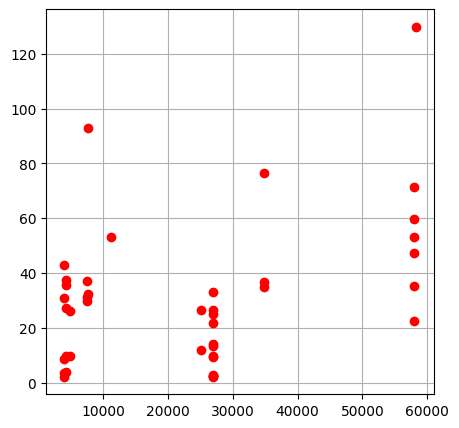

In [44]:
fig, axes = plt.subplots()
fig.set_size_inches(5, 5)
axes.set_axisbelow(True)
axes.plot(srl_pinus.traitValue, linestyle="none", marker="o", color="red")# , edgecolor="black")
axes.grid()
plt.show()